In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a Robot Simulator in 2D

In [2]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [3]:
import numpy as np


def simulate(Δt, x, u, w):
  # dealta t: time step
  # u is control input (in form u = [x-direction, y-direction]T)
  # x ia start location (in form x = [x-position, y-postion]T)
  # x += deltat * u means return the postion depends on summation timestep and control input.

  # add a disturbances "wind" for simulator
    x += Δt * (u + w)
    return x


### Control policy

In [4]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:

    # stright line control policy
    # ux = 2*t
    # uy = 0

    # ellipse control policy
    ux = -sin(2*t)
    uy = cos(2*t)

    return array([ux, uy])

### Running the simulator

In [5]:
tf = 10.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

 # w: wind disturbances
w = array([0.1, 0.1])

# Initial conditions
x = array([2., 1.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u, w)
    x_log.append(copy(x))

x_log = array(x_log)

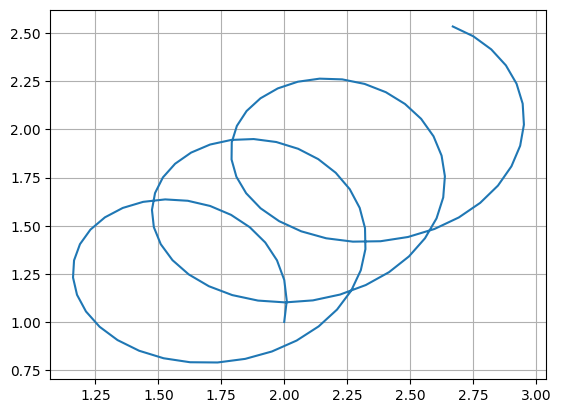

In [6]:
grid()
plot(x_log[:,0], x_log[:,1])

In [7]:
!pip install JSAnimation


  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11405 sha256=20c074f6969e3357c3732b81c060c7465efe87c15496d9fce3ac1031e45d0f3f
  Stored in directory: /root/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


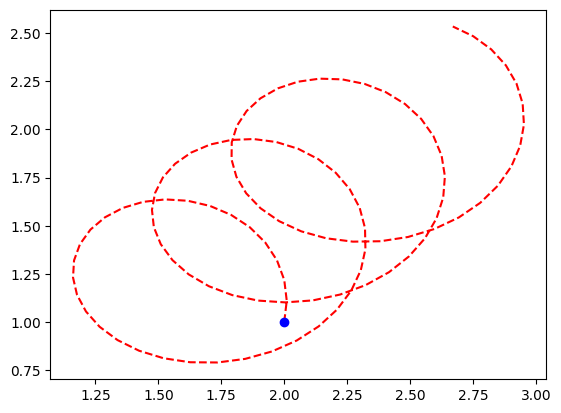

In [8]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')

    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')



anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())